In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import plotly.express as px
import requests
from sklearn import linear_model, datasets

Build a regression model.

In [15]:
df_to_bikes = pd.read_csv('df_bikes.csv')
df_to_bikes = df_to_bikes.drop(['Unnamed: 0'], axis = 1)
df_to_bikes

,name,latitude,longitude,empty_slots,free_bikes,total_bikes
0,Queen St E / Woodward Ave,43.665269,-79.319796,4,15,19
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,10,5,15
2,Queen St. E / Rhodes Ave.,43.666224,-79.317693,13,10,23
3,Bond St / Queen St E,43.653236,-79.376716,19,2,21
4,Church St / Alexander St,43.663722,-79.380288,18,6,24
...,...,...,...,...,...,...
690,Leslie St / Commissioners St,43.657275,-79.326615,4,10,14
691,Greenwood Ave / Sammon Ave,43.686987,-79.334782,6,5,11
692,Lansdowne Subway Station,43.659229,-79.443209,6,17,23
693,Warden Subway Station,43.711611,-79.280556,13,6,19


In [22]:
df_foursquare = pd.read_csv('df_foursquare.csv')
df_foursquare = df_foursquare.drop(['Unnamed: 0'], axis = 1)
df_foursquare

,name,category,city,region,country,latitude,longitude,distance,search_latitude,search_longitude
0,Leslieville Farmers Market,Farmers Market,Toronto,ON,CA,43.664679,-79.319687,40,43.665269,-79.319796
1,McDonald's,Burger Joint,Toronto,ON,CA,43.665065,-79.319000,62,43.665269,-79.319796
2,T.O. Ceviche Bar,Peruvian Restaurant,Toronto,ON,CA,43.665973,-79.318863,108,43.665269,-79.319796
3,Chalet Beauty Bar,Hair Salon,Toronto,ON,CA,43.665973,-79.318863,108,43.665269,-79.319796
4,Chick-N-Joy,Diner,Toronto,ON,CA,43.665121,-79.321347,129,43.665269,-79.319796
...,...,...,...,...,...,...,...,...,...,...
32155,Tim Choi Chinese Food,Chinese Restaurant,Scarborough,ON,CA,43.745400,-79.220350,849,43.745311,-79.209707
32156,Tropics Restaurant and Bar,Restaurant,Scarborough,ON,CA,43.745400,-79.220350,854,43.745311,-79.209707
32157,Join Sushi,Sushi Restaurant,Toronto,ON,CA,43.738910,-79.217607,951,43.745311,-79.209707
32158,Domino's Pizza,Pizzeria,Toronto,ON,CA,43.738878,-79.218070,967,43.745311,-79.209707


In [77]:
df_yelp_duplicates = pd.read_csv('df_yelp_duplicates.csv')
df_yelp_duplicates = df_yelp_duplicates.drop(['Unnamed: 0'], axis = 1)
df_yelp_duplicates

,id,alias,name,url,review_count,categories,rating,phone,display_phone,distance,coordinates.latitude,coordinates.longitude,location.address1,location.city,location.zip_code,location.country,location.state,price,search_lat,search_long
0,iAEuxSiOjgandA3_xV-IQA,tulia-osteria-toronto,Tulia Osteria,https://www.yelp.com/biz/tulia-osteria-toronto...,1.0,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",5.0,1.416462e+10,+1 416-461-6400,365.115394,43.664870,-79.324250,1402 Queen Street E,Toronto,M4L 1C9,CA,ON,NaN,43.665269,-79.319796
1,ILSWNor1STnYyDLsraEY2w,betty-s-east-toronto,Betty’s East,https://www.yelp.com/biz/betty-s-east-toronto?...,6.0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",3.5,1.416902e+10,+1 416-901-5575,689.778721,43.663455,-79.327992,1301 Queen Street E,Toronto,M4L 1C2,CA,ON,NaN,43.665269,-79.319796
2,8EbtXXmu7F-gsOsR0xPmjg,lloyds-on-queen-toronto,Lloyd's On Queen,https://www.yelp.com/biz/lloyds-on-queen-toron...,1.0,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",5.0,1.416552e+10,+1 416-551-8158,707.598820,43.663801,-79.328356,1298 Queen St E,Toronto,M4L 1C4,CA,ON,NaN,43.665269,-79.319796
3,Z1r6b30Tg0n0ME4-Zj2wQQ,boardwalk-place-toronto,Boardwalk Place,https://www.yelp.com/biz/boardwalk-place-toron...,15.0,"[{'alias': 'pubs', 'title': 'Pubs'}]",2.5,1.416695e+10,+1 416-694-8844,758.567399,43.663010,-79.310898,1675 Lake Shore Boulevard E,Toronto,M4W 3L6,CA,ON,$$,43.665269,-79.319796
4,qDu0hVnzAaKpUYPz2kS9sg,baldev-paan-cold-drink-house-toronto,Baldev Paan Cold Drink House,https://www.yelp.com/biz/baldev-paan-cold-drin...,3.0,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",3.0,1.416464e+10,+1 416-463-7226,772.512252,43.671710,-79.323520,1399 Gerrard Street E,Toronto,M4L 1Z5,CA,ON,NaN,43.665269,-79.319796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20562,h6vkdFEZOLASM8z_Sm_wQw,bloor-bar-billard-toronto,Bloor Bar Billard,https://www.yelp.com/biz/bloor-bar-billard-tor...,2.0,"[{'alias': 'poolhalls', 'title': 'Pool Halls'}]",3.0,1.416532e+10,+1 416-531-9249,890.064181,43.660680,-79.432370,1050 Bloor Street W,Toronto,M6H 1M3,CA,ON,NaN,43.659229,-79.443209
20563,_qAmhbC7mZpiblBMrhIH7A,the-commoner-toronto,The Commoner,https://www.yelp.com/biz/the-commoner-toronto?...,61.0,"[{'alias': 'gastropubs', 'title': 'Gastropubs'}]",4.0,1.647351e+10,+1 647-351-2067,897.330674,43.651910,-79.447970,2067 Dundas Street W,Toronto,M6R,CA,ON,NaN,43.659229,-79.443209
20564,QbezpPQVADzR58m5Ngy2NQ,the-olde-stone-cottage-pub-and-patio-scarborough,The Olde Stone Cottage Pub & Patio,https://www.yelp.com/biz/the-olde-stone-cottag...,60.0,"[{'alias': 'pubs', 'title': 'Pubs'}, {'alias':...",3.5,1.416266e+10,+1 416-265-7932,184.130215,43.746920,-79.209090,3750 Kingston Road,Scarborough,M1J 3H5,CA,ON,$$,43.745311,-79.209707
20565,FgHjnpJkCMj62b9P6n7Iig,aces-place-bar-grill-hub-toronto,Ace's Place Bar Grill Hub,https://www.yelp.com/biz/aces-place-bar-grill-...,34.0,"[{'alias': 'newcanadian', 'title': 'Canadian (...",3.5,1.416265e+10,+1 416-265-2237,811.947175,43.747273,-79.199970,113 Guildwood Parkway,Toronto,M1E 1P1,CA,ON,$$,43.745311,-79.209707


In [99]:
df_yelp_unique = pd.read_csv('df_yelp_unique.csv')
df_yelp_unique = df_yelp_unique.drop(['Unnamed: 0'], axis = 1)
df_yelp_unique.head()

,id,alias,name,url,review_count,categories,rating,phone,display_phone,distance,coordinates.latitude,coordinates.longitude,location.address1,location.city,location.zip_code,location.country,location.state,price,search_lat,search_long
0,oKZPgeCOxnVSxudYcn1OtQ,cibo-wine-bar-toronto-11,Cibo Wine Bar,https://www.yelp.com/biz/cibo-wine-bar-toronto...,366.0,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",3.5,1.416504e+10,+1 416-504-3939,1.023678e-09,43.645210,-79.397370,522 King Street W,Toronto,M5V 1L7,CA,ON,$$,43.645102,-79.397450
1,G12kABl0tfK4ylgj8XF06w,voodoo-child-toronto,Voodoo Child,https://www.yelp.com/biz/voodoo-child-toronto?...,142.0,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,1.647748e+10,+1 647-748-1011,7.799635e+00,43.657140,-79.405520,388 College Street,Toronto,M5T 1S7,CA,ON,$$,43.657100,-79.405600
2,V_gL6e7qdJIlFNSWnv8q1g,radical-road-brewing-toronto,Radical Road Brewing,https://www.yelp.com/biz/radical-road-brewing-...,43.0,"[{'alias': 'breweries', 'title': 'Breweries'},...",4.5,1.647795e+10,+1 647-794-7909,9.369660e+00,43.662633,-79.332479,1177 Queen Street E,Toronto,M4M 1L5,CA,ON,$$,43.662663,-79.332370
3,__sFR-vZ3YoEfruj0rZV5Q,jenni-place-toronto,Jenni Place,https://www.yelp.com/biz/jenni-place-toronto?a...,7.0,"[{'alias': 'bars', 'title': 'Bars'}]",3.0,1.416470e+10,+1 416-469-5840,1.001081e+01,43.671800,-79.324810,1338 Gerrard Street E,Toronto,M4L 1Z2,CA,ON,$,43.671771,-79.324961
4,59gz9i2bVcdifaiGqf_chw,batl-axe-throwing-toronto-2,BATL Axe Throwing,https://www.yelp.com/biz/batl-axe-throwing-tor...,21.0,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",4.5,1.647794e+10,+1 647-793-6410,1.145326e+01,43.673039,-79.468134,30 Weston Rd,Toronto,M6N 3P4,CA,ON,NaN,43.673019,-79.467994


In [52]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [89]:
X = df_yelp_unique['distance'].values.reshape(-1,1)
Y = df_yelp_unique['rating'].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

Provide model output and an interpretation of the results. 

Average Rating by Distance from Search

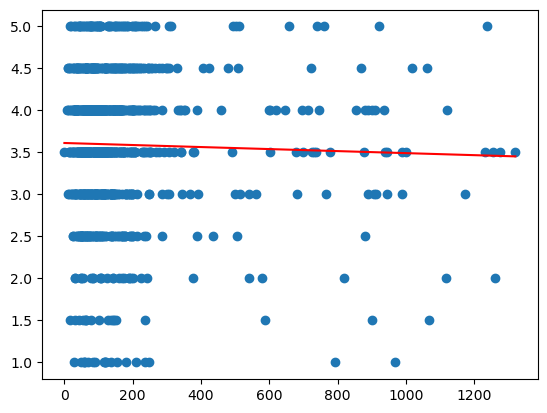

In [90]:
plt.scatter(X,Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Data is extremely likely to be uncorrelated, linear regression suggests an extremely weak negative correlation in which a restaurant's average rating decreases proportionally to its distance from the bike station.

In [47]:
model = lin_reg.fit()
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.830e+33
Date:                Thu, 31 Aug 2023   Prob (F-statistic):                        0.00
Time:                        15:15:39   Log-Likelihood:                      1.0712e+06
No. Observations:               34750   AIC:                                 -2.142e+06
Df Residuals:                   34749   BIC:                                 -2.142e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
business_rating     1.0000   1.44e-17   6.95e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     2803.049   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1583.829
Skew:                           0.379   Prob(JB):                         0.00
Kurtosis:                       2.279   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Stretch

How can you turn the regression model into a classification model?

If correlations existed, 


An example of an effetive analaysis using a classification model for this data set could be:

Use geographic density of businesses by category to predict the category of a new business based on its coordinates using 'K-nearest neighbours'.